# Parte 2 - Actividad 1

Seguiremos trabajando con el conjunto de datos de 120 años de historia olímpica adquirido por Randi Griffin en Randi Griffin

Como especialista en visualización, su tarea consiste en crear dos parcelas para los ganadores de medallas de 2016 de cinco deportes: atletismo, natación, remo, fútbol y hockey

- Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.

- Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

Utilizar su creatividad y sus habilidades para sacar conclusiones importantes de los datos.

## Solución

Para realizar esta parte, realizaremos los siguientes pasos:

- paso 1 y 2:
Descargue el conjunto de datos y formatéelo como un pandas DataFrame.
Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad.


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [47]:
medallas = pd.read_csv('C:/Users/Usuario/Downloads/athlete_events.csv')
medallas.head(5)
medalsnew = medallas[medallas['Medal'].notna()]
medconceb = medalsnew[medalsnew['Year'] == 2016]
countmedals = medconceb['Sport'].value_counts()
topfive = countmedals.head(5)


topsports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

newtop = medconceb[medconceb['Sport'].isin(topsports)]
newtop.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


- paso 4:
Observe las características del conjunto de datos y anote su tipo de datos: ¿son categóricos o numéricos?

El siguiente código nos proporciona el tipo de variables que contiene nuestro dataframe.

In [48]:
newtop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 158 to 271019
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      732 non-null    int64  
 1   Name    732 non-null    object 
 2   Sex     732 non-null    object 
 3   Age     732 non-null    float64
 4   Height  729 non-null    float64
 5   Weight  727 non-null    float64
 6   Team    732 non-null    object 
 7   NOC     732 non-null    object 
 8   Games   732 non-null    object 
 9   Year    732 non-null    int64  
 10  Season  732 non-null    object 
 11  City    732 non-null    object 
 12  Sport   732 non-null    object 
 13  Event   732 non-null    object 
 14  Medal   732 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 91.5+ KB


- Paso 5:
Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de height y weight

Para esta parte, fue utilizado un diagrama de dispersión, ya que, se puede observar de manera sencilla la información que se desea obtener.

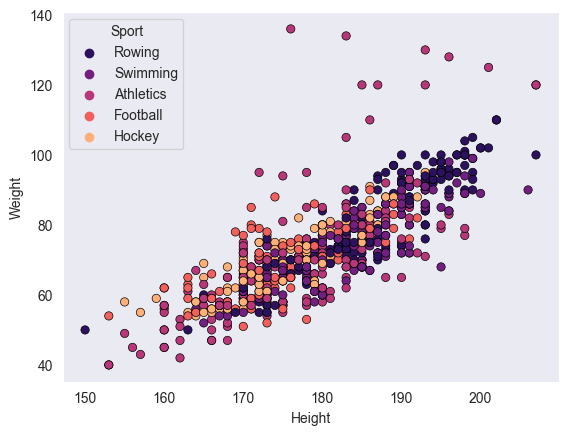

In [49]:
relacion = newtop[['Height', 'Weight','Sport']].dropna()
sns.set_style("dark")
color = cm.magma(0.5)
sns.scatterplot(data=relacion,x='Height', y='Weight' , hue="Sport",  palette="magma",edgecolor = 'black')
plt.show()

De la grafica anterior, podemos observar que las variables peso y altura tienen una correlación positva, lo que significa que cuando una de las variables aumenta la otra tambien lo hace.

- Paso 6:
Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de height y weight en función de las medallas, separadas además por género de los atletas.

 

Se realizó un diagrama de cajas para mostrar la información con respecto a la altura de los jugadores que ganaron medallas.

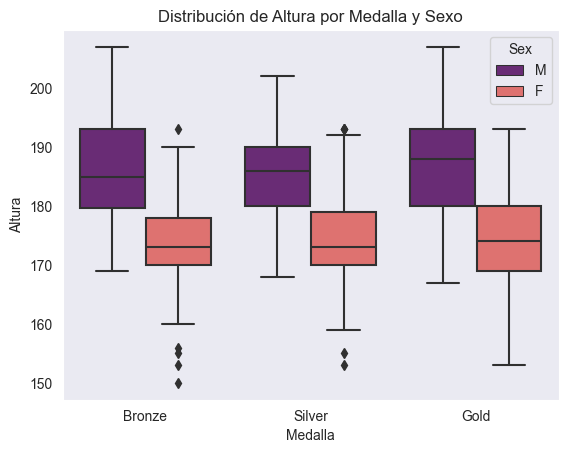

In [50]:
datos = newtop[['Height','Weight','Sex','Medal']].dropna()
sns.set_style("dark")
sns.boxplot(data=datos, x='Medal',y='Height',hue='Sex',palette="magma")
plt.title('Distribución de Altura por Medalla y Sexo') 
plt.xlabel('Medalla')  
plt.ylabel('Altura')

plt.show()

Luego se realizó otro diagrama de cajas, pero esta vez, con la información con respecto al peso por medalla y sexo.

Text(0, 0.5, 'Peso')

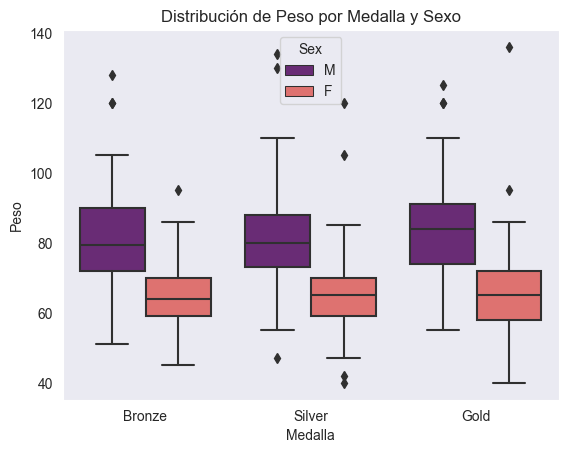

In [51]:
sns.boxplot(data=datos, x='Medal',y='Weight',hue='Sex',palette="magma")
plt.title('Distribución de Peso por Medalla y Sexo') 
plt.xlabel('Medalla')  
plt.ylabel('Peso')